In [1]:
import pickle 
import pandas as pd
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [3]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [4]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [5]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
len(all_vacancy_ids)

908

In [11]:
def getPage(page=0):
    '''получение страницы со списком вакансий'''
    params = {
        'employer_id': '3529',
        'area': 1,
        'page': page,
        'per_page': 100
    }
    
    res = requests.get('https://api.hh.ru/vacancies', params)
    vacancies = res.json()
    res.close()
    return vacancies

In [12]:
def getVacancy(vac_id='43326020'):
    '''Получение вакансии по ее идентификатору'''
    res = requests.get(f'https://api.hh.ru/vacancies/{vac_id}')
    vacancy = res.json()
    res.close()
    return vacancy

In [13]:
def makeDataFrame(page=0):
    '''Создание DF'''
    for page in range(0, getPage(page)['pages'] + 1):
        if page == 0:
            vacancies_data = pd.DataFrame(getPage(page)['items'])
        else:
            vacancies_data = vacancies_data.append(pd.DataFrame(getPage(page)['items']), ignore_index=True)
    return vacancies_data

In [14]:
def addSkillsColumn(dataframe, page=0):
    '''добавление столбца skills'''
    skills_dict = {}
    for page in range(0, getPage(page)['pages'] + 1):
        for df_item in getPage(page)['items']:
            for key, value in df_item['snippet'].items():
                if key == 'requirement':
                    skills_dict[df_item['id']] = value
    return dataframe['id'].map(skills_dict)

In [16]:
vacancies_data = makeDataFrame() # создание таблицы
vacancies_data['skills'] = addSkillsColumn(vacancies_data) # добавление колонки skills
vacancies_data['published_at'] = pd.to_datetime(vacancies_data['published_at'].str[:10], format='%Y-%m-%d') #редактирование формата даты

vacancies_data.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,immediate_redirect_url,skills
0,54162408,False,"Стажёр по направлению ""Data Engineering"" от SB...","{'id': '3529-3529-it', 'name': 'Сбер. IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 30000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...","{'requirement': 'так же студент 3 курса.', 're...",None,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False,NaN,так же студент 3 курса.
1,53568652,False,Менеджер по обслуживанию,"{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 67000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Хочешь стать экспертом в банк...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Хочешь стать экспертом в банковской сфере. Доб...
2,46380141,False,Менеджер по работе с клиентами,"{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 89000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Опыт работы консультантом или...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False,NaN,Опыт работы консультантом или промоутером прив...
3,52849639,False,Финансовый консультант,"{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...","{'requirement': None, 'responsibility': 'Встре...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,None
4,48420353,False,Бизнес-аналитик,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3529', 'name': 'Сбербанк', 'url': 'htt...",{'requirement': 'Внедрение ИИ в разные направл...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Внедрение ИИ в разные направления деятельности...


In [17]:
vacancies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        908 non-null    object        
 1   premium                   908 non-null    bool          
 2   name                      908 non-null    object        
 3   department                908 non-null    object        
 4   has_test                  908 non-null    bool          
 5   response_letter_required  908 non-null    bool          
 6   area                      908 non-null    object        
 7   salary                    52 non-null     object        
 8   type                      908 non-null    object        
 9   address                   281 non-null    object        
 10  response_url              3 non-null      object        
 11  sort_point_distance       0 non-null      object        
 12  published_at          

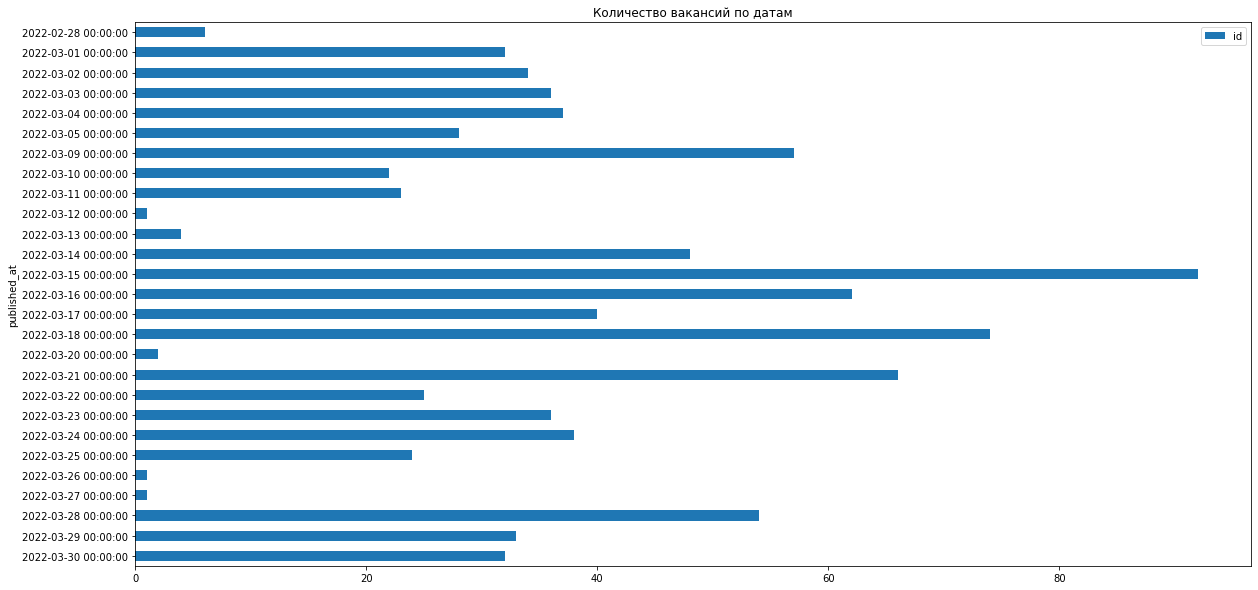

In [30]:
# Постройте график опубликованных вакансий по датам
vacancies_data.groupby('published_at')['id'].count().reset_index().sort_values(
                                        by='published_at',ascending=False).plot(
                                        kind='barh', x='published_at', y='id',figsize=(20, 10), title='Количество вакансий по датам'); 


In [23]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

vacancies_data['published_weekday'] = vacancies_data['published_at'].dt.day_name() # извлечение дня недели

vacancies_data.groupby('published_weekday')['id'].count().sort_values(ascending=False).nlargest(1) 

published_weekday
Wednesday    221
Name: id, dtype: int64

In [42]:
# Найдите те вакансии с использованием python, которые вам интересны

t1 = vacancies_data.name.str.contains('аналитик|данных|data|analyst', na=False)
t2 = vacancies_data.skills.str.contains('python', na=False)
like = vacancies_data[t1 | t2].reset_index()
like.head()

,index,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,immediate_redirect_url,skills,published_day_name,published_weekday
0,4,48420353,False,Бизнес-аналитик,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Внедрение ИИ в разные направления деятельности...,Tuesday,Tuesday
1,24,54154544,False,Главный экономист Управления аналитики по расх...,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Высшее образование. Опыт работы экономистом (ш...,Monday,Monday
2,50,53861444,False,Аналитик данных Сбер,"{'id': '3529-3529-data', 'name': 'Сбер. Data S...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Высшее техническое образование. - Опыт работы ...,Tuesday,Tuesday
3,53,54167022,False,Аналитик данных,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Навыки формирования SQL- запросов к базам данн...,Monday,Monday
4,57,53802196,False,Аналитик данных,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,Высшее образование техническое или экономическ...,Monday,Monday


<AxesSubplot:ylabel='name'>

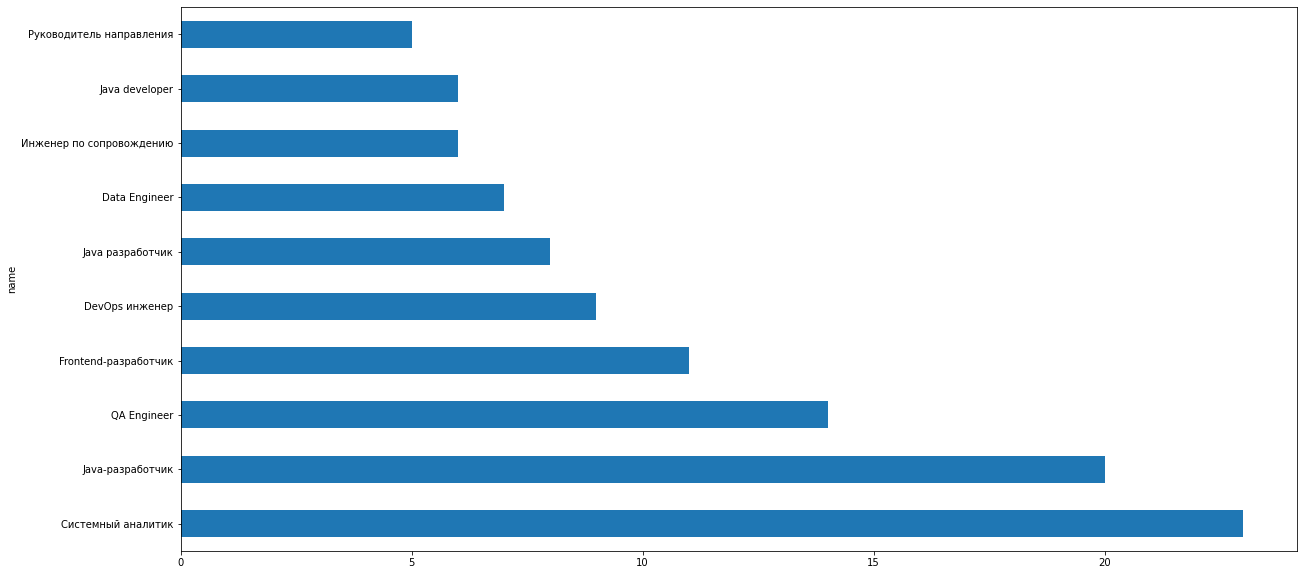

In [27]:
# Постройте график наиболее востребованных вакансий

vacancies_data.groupby('name')['id'].count().sort_values(
                ascending=False).nlargest(10).plot(
                kind='barh', figsize=(20, 10))

In [28]:
getVacancy(vac_id='43326020')

{'id': '43326020',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Специалист по экономической безопасности',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p><strong>Обязанности:</strong></p> <p> </p> <ul> <li>Поиск и анализ информации в отношении клиентов/контрагентов Банка для оценки уровня кредитных рисков, рисков деловой репутации, иных рисков сотрудничества с контрагентами, в т.ч. в рамках закупочных проце